In [1]:
import numpy as np
import pandas as pd


Initial analysis shows 4500 accounts, being accessed by a total of 5369 clients.

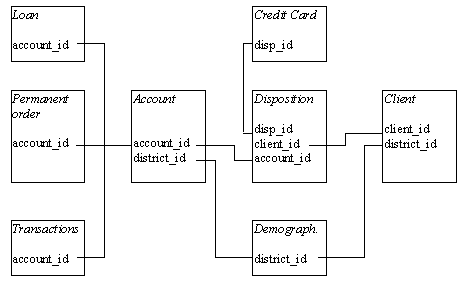

In [2]:
#start with the client data
#split into birth years to make less complex
#remove gender from the birth number attribute

client = pd.read_csv('client.asc',sep=';',low_memory=False)
birthdays = []
male = []
for i in client['birth_number']:
    birth_year = int(str(i)[0:2])
    gender = int(str(i)[2:4])
    birthdays.append(birth_year)
    if gender<13:
        male.append(1)
    else:
        male.append(0)

for i in range(5369):
    client['birth_number'][i] = birthdays[i]
        
client['male_gender'] = male      
client

,client_id,birth_number,district_id,male_gender
0,1,70,18,0
1,2,45,1,1
2,3,40,1,0
3,4,56,5,1
4,5,60,5,0
...,...,...,...,...
5364,13955,45,1,0
5365,13956,43,1,1
5366,13968,68,61,1
5367,13971,62,67,0


In [3]:
disp = pd.read_csv('disp.asc', sep=';',low_memory=False)
owner = []
for i in range(len(disp)):
    if disp['type'][i] == "OWNER":
        owner.append(1)
    else:
        owner.append(0)
        
disp.drop('type', axis=1, inplace=True)
disp['owner'] = owner
#one-hot-encode owner of account

#merge client set with disposition
disp_client = pd.merge(disp, client)
disp_client

,disp_id,client_id,account_id,owner,birth_number,district_id,male_gender
0,1,1,1,1,70,18,0
1,2,2,2,1,45,1,1
2,3,3,2,0,40,1,0
3,4,4,3,1,56,5,1
4,5,5,3,0,60,5,0
...,...,...,...,...,...,...,...
5364,13647,13955,11349,1,45,1,0
5365,13648,13956,11349,0,43,1,1
5366,13660,13968,11359,1,68,61,1
5367,13663,13971,11362,1,62,67,0


In [21]:
card = pd.read_csv('card.asc',sep=';',low_memory=False)
#remove useless features
card.drop(['card_id','issued'], axis=1, inplace=True)


#merge card data and one-hot encode this
disp_card_client = pd.merge(disp_client, card, how="outer", on=["disp_id"])
disp_card_client.rename(columns={'type': 'card_type'}, inplace=True)
disp_card_client = pd.get_dummies(disp_card_client, prefix=['card_type'])
disp_card_client

,disp_id,client_id,account_id,owner,birth_number,district_id,male_gender,card_type_classic,card_type_gold,card_type_junior
0,1,1,1,1,70,18,0,0,0,0
1,2,2,2,1,45,1,1,0,0,0
2,3,3,2,0,40,1,0,0,0,0
3,4,4,3,1,56,5,1,0,0,0
4,5,5,3,0,60,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5364,13647,13955,11349,1,45,1,0,0,0,0
5365,13648,13956,11349,0,43,1,1,0,0,0
5366,13660,13968,11359,1,68,61,1,1,0,0
5367,13663,13971,11362,1,62,67,0,0,0,0


In [29]:
#transalte to english and remove useless features
account = pd.read_csv('account.asc',sep=';',low_memory=False)
account = account.replace(['POPLATEK MESICNE','POPLATEK TYDNE','POPLATEK PO OBRATU'],['monthly','weekly','after_trans'])
account.drop(['date'], axis=1, inplace=True)

new = pd.merge(disp_card_client, account, how="outer", on=["account_id"])
new.rename(columns={'frequency': 'statement_frequency','district_id_x': 'district_id'}, inplace=True)
new


,disp_id,client_id,account_id,owner,birth_number,district_id,male_gender,card_type_classic,card_type_gold,card_type_junior,district_id_y,statement_frequency
0,1,1,1,1,70,18,0,0,0,0,18,monthly
1,2,2,2,1,45,1,1,0,0,0,1,monthly
2,3,3,2,0,40,1,0,0,0,0,1,monthly
3,4,4,3,1,56,5,1,0,0,0,5,monthly
4,5,5,3,0,60,5,0,0,0,0,5,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13647,13955,11349,1,45,1,0,0,0,0,1,weekly
5365,13648,13956,11349,0,43,1,1,0,0,0,1,weekly
5366,13660,13968,11359,1,68,61,1,1,0,0,61,monthly
5367,13663,13971,11362,1,62,67,0,0,0,0,67,monthly


In [31]:
demo = pd.read_csv('district.asc',sep=';',low_memory=False)
demo.rename(columns={'A1': 'district_id'}, inplace=True)

demo_new = pd.merge(new, demo, how="outer", on=["district_id"])
demo_new

,disp_id,client_id,account_id,owner,birth_number,district_id,male_gender,card_type_classic,card_type_gold,card_type_junior,...,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,1,1,1,70,18,0,0,0,0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,420,420,343,1,78,18,1,0,0,0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
2,499,499,413,1,35,18,0,0,0,0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
3,519,519,431,1,80,18,1,0,0,1,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
4,682,682,568,1,79,18,1,0,0,0,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,9622,9930,8039,1,72,9,1,1,0,0,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5365,9762,10070,8153,1,74,9,1,0,0,0,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5366,10958,11266,9153,1,38,9,1,0,0,0,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5367,10959,11267,9153,0,36,9,0,0,0,0,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487


In [39]:
trans = pd.read_csv('trans.asc',sep=';',low_memory=False)
order = pd.read_csv('order.asc',sep=';',low_memory=False)
loan = pd.read_csv('loan.asc',sep=';',low_memory=False)

trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN
